* In this Notebook we will classify the Maleria cells unsing a transfer learning model.
*The dataset has two catagories, Infected and Uninfected.
 Both of them have equal number of image files. We will split them to train and test dataset and use them for training and testing.


* Author: Abhisek Saha

*   This dataset is downloaded from https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria
*   The original Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/

In [1]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [2]:
# Getting Dependencies
import os
import shutil
import glob
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import img_to_array, ImageDataGenerator
#from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
#from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
#from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/Data/

/content/drive/MyDrive/Colab Notebooks/Data


In [4]:
!ls

animal10			 Maleria_cell_images.zip
archive.zip			 maleria_mobilenet_weights.h5
bestanimal10predictor.hdf5	 model.h5
cats_and_dogs_filtered		 my_model_weights.h5
cell_images			 __pycache__
chest_xray			 raw-img
chest_xray.zip			 raw-intel-images
intelimage_mobilenet_weights.h5  translate.py
intel_images.zip


# Data Preprocessing

In [ ]:
#!unzip Maleria_cell_images.zip

In [ ]:
!ls

animal10		    intelimage_mobilenet_weights.h5  __pycache__
archive.zip		    intel_images.zip		     raw-img
bestanimal10predictor.hdf5  Maleria_cell_images.zip	     raw-intel-images
cats_and_dogs_filtered	    model.h5			     translate.py
cell_images		    my_model_weights.h5


In [ ]:
!ls cell_images

cell_images  Parasitized  Uninfected


In [ ]:
glob.glob('cell_images/*')

['cell_images/Parasitized',
 'cell_images/Uninfected',
 'cell_images/cell_images']

In [ ]:
if os.path.isdir('cell_images/cell_images'):
  shutil.rmtree('cell_images/cell_images')

In [ ]:
glob.glob('cell_images/*')

['cell_images/Parasitized', 'cell_images/Uninfected']

In [ ]:
# Number of files in each sub-category
for dir in os.listdir('cell_images'):
  print(dir, len(os.listdir('cell_images/'+dir)) )

Parasitized 13780
Uninfected 13780


# Splitting dataset into train and test

In [ ]:
if not os.path.isdir('cell_images/train'):
  os.mkdir('cell_images/train/')
if not os.path.isdir('cell_images/test'):
  os.mkdir('cell_images/test/')

for dir in glob.glob('cell_images/*ed'):
  if not os.path.isdir('cell_images/train/'+dir[12:]):
    os.makedirs('cell_images/train/'+dir[12:])
  if not os.path.isdir('cell_images/test/'+dir[12:]):
    os.makedirs('cell_images/test/'+dir[12:])

In [ ]:
!ls cell_images/train

Parasitized  Uninfected


In [ ]:
for dir in glob.glob('cell_images/*ed'):
  print(dir[12:])

Parasitized
Uninfected


In [ ]:
#shutil.rmtree('cell_images/train/cell_images')
#shutil.rmtree('cell_images/test/cell_images')

In [ ]:
for file in os.listdir('cell_images/Parasitized')[0:10000]:
  shutil.copyfile('cell_images/Parasitized/'+file, 'cell_images/train/Parasitized/'+file)
for file in os.listdir('cell_images/Parasitized')[10000:]:
  shutil.copyfile('cell_images/Parasitized/'+file, 'cell_images/test/Parasitized/'+file)

for file in os.listdir('cell_images/Uninfected')[0:10000]:
  shutil.copyfile('cell_images/Uninfected/'+file, 'cell_images/train/Uninfected/'+file)
for file in os.listdir('cell_images/Uninfected')[10000:]:
  shutil.copyfile('cell_images/Uninfected/'+file, 'cell_images/test/Uninfected/'+file)

In [4]:
# Directory paths
base_path = "/content/drive/MyDrive/Colab Notebooks/Data/cell_images/"
train_path = os.path.join(base_path, "train/")
test_path = os.path.join(base_path, "test/")
train_path

'/content/drive/MyDrive/Colab Notebooks/Data/cell_images/train/'

-----------------Images from Train Folder---------------


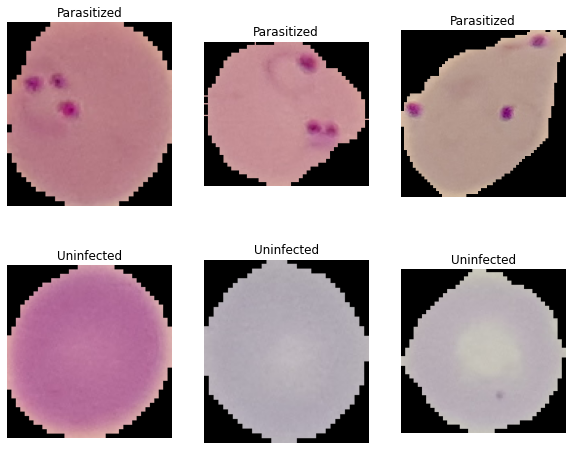

In [5]:
# Checking some random files from train folder
import random
import matplotlib.image as mpimg

print("-----------------Images from Train Folder---------------")
print("=========================================================")

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,8))
k=0
for dir in os.listdir(train_path):
  for i in range(3):
    random_image = random.sample(os.listdir(train_path+dir),1)
    img = mpimg.imread(train_path+dir+'/'+random_image[0])
    ax[k,i].imshow(img)
    ax[k,i].set_title(dir)
    ax[k,i].axis('off')
  k+=1

------Images from Test Folder-----------


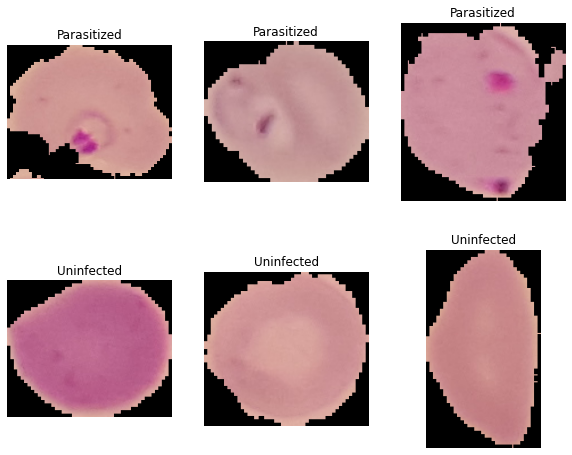

In [6]:
# Checking some random files from test folder

print("------Images from Test Folder-----------")
print("=============================================")
k=0
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,8))

for dir in os.listdir(test_path):
  for i in range(3):
    random_test_image = random.sample(os.listdir(test_path+dir),1)
    img = mpimg.imread(test_path+dir+'/'+random_test_image[0])
    ax[k,i].imshow(img)
    ax[k,i].set_title(dir)
    ax[k,i].axis('off')
  k+=1

In [7]:
print("Number of images in train directory:")
print("---------------------------------------")
for dir in os.listdir(train_path):
  print(dir,len(os.listdir(train_path+dir)))

print("Number of images in test directory:")
print("---------------------------------------")
for dir in os.listdir(test_path):
  print(dir,len(os.listdir(test_path+dir)))

Number of images in train directory:
---------------------------------------
Parasitized 10000
Uninfected 10000
Number of images in test directory:
---------------------------------------
Parasitized 3780
Uninfected 3780


In [ ]:
#shutil.rmtree('cell_images/Parasitized')
#shutil.rmtree('cell_images/Uninfected')

In [ ]:
!ls cell_images/

test  train


In [ ]:
print("train_path: ", train_path)
print("test path: ",test_path)

train_path:  /content/drive/MyDrive/Colab Notebooks/Data/cell_images/train/
test path:  /content/drive/MyDrive/Colab Notebooks/Data/cell_images/test/


# Image Augmentation

In [8]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(128,128),
                                                    class_mode='sparse',
                                                    batch_size=50)

val_generator = test_datagen.flow_from_directory(test_path,
                                                 target_size=(128,128),
                                                 class_mode='sparse',
                                                 batch_size=50)

Found 20000 images belonging to 2 classes.
Found 7558 images belonging to 2 classes.


# Build Model

In [9]:
# Creating an instance of pre-trained model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

base_model = MobileNetV2(input_shape=(128,128,3),
                         weights='imagenet',
                         include_top=False)

In [10]:
base_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][

In [11]:
# Making layers of pre-trained model non-trainable

for layer in base_model.layers:
  layer.trainable=False

In [12]:
folders = glob.glob(train_path+'*')
folders, len(folders)

(['/content/drive/MyDrive/Colab Notebooks/Data/cell_images/train/Parasitized',
  '/content/drive/MyDrive/Colab Notebooks/Data/cell_images/train/Uninfected'],
 2)

In [13]:
from tensorflow.keras.layers import GlobalAvgPool2D
# Creating the complete model

model = Sequential()
model.add(base_model)
model.add(GlobalAvgPool2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              1311744   
                                                                 
 dense_1 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 3,571,778
Trainable params: 1,313,794
Non-trainable params: 2,257,984
_________________________________________________________________


In [18]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.metrics.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [19]:
# Early Stopping
import keras

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98):
      print("\nReached 98% accuracy so cancelling training!")
      self.model.stop_training = True

callback = myCallback()

In [20]:
# Fitting our Model
hist = model.fit(train_generator,
                 steps_per_epoch=200,
                 epochs=20,
                 validation_data=val_generator,
                 validation_steps=58,
                 verbose=2,
                 callbacks=[callback])

Epoch 1/20
200/200 - 156s - loss: 0.3584 - accuracy: 0.8833 - val_loss: 0.2798 - val_accuracy: 0.9007 - 156s/epoch - 779ms/step
Epoch 2/20
200/200 - 147s - loss: 0.1884 - accuracy: 0.9276 - val_loss: 0.1988 - val_accuracy: 0.9269 - 147s/epoch - 735ms/step
Epoch 3/20
200/200 - 146s - loss: 0.1692 - accuracy: 0.9344 - val_loss: 0.2261 - val_accuracy: 0.9110 - 146s/epoch - 732ms/step
Epoch 4/20
200/200 - 152s - loss: 0.1728 - accuracy: 0.9333 - val_loss: 0.1861 - val_accuracy: 0.9259 - 152s/epoch - 759ms/step
Epoch 5/20
200/200 - 145s - loss: 0.1574 - accuracy: 0.9423 - val_loss: 0.4079 - val_accuracy: 0.8303 - 145s/epoch - 724ms/step
Epoch 6/20
200/200 - 146s - loss: 0.1579 - accuracy: 0.9388 - val_loss: 0.1823 - val_accuracy: 0.9338 - 146s/epoch - 731ms/step
Epoch 7/20
200/200 - 144s - loss: 0.1441 - accuracy: 0.9486 - val_loss: 0.1816 - val_accuracy: 0.9290 - 144s/epoch - 722ms/step
Epoch 8/20
200/200 - 142s - loss: 0.1432 - accuracy: 0.9463 - val_loss: 0.1889 - val_accuracy: 0.9238 - 

In [16]:
import h5py
h5py.run_tests()

1

In [ ]:
# Saving Weights of different layers of our model 
from tensorflow.keras.models import save_model
model.save_weights('maleria_mobilenet_weights.h5')

## Testing Model Performance

In [21]:
# Checking model accuracy
model_accuracy = model.evaluate(val_generator, steps=len(val_generator))
print("Model Accuracy %.2f"%(model_accuracy[1]*100))

152/152 [==============================] - 93s 608ms/step - loss: 0.2397 - accuracy: 0.9058
Model Accuracy 90.58


In [22]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
epochs

20

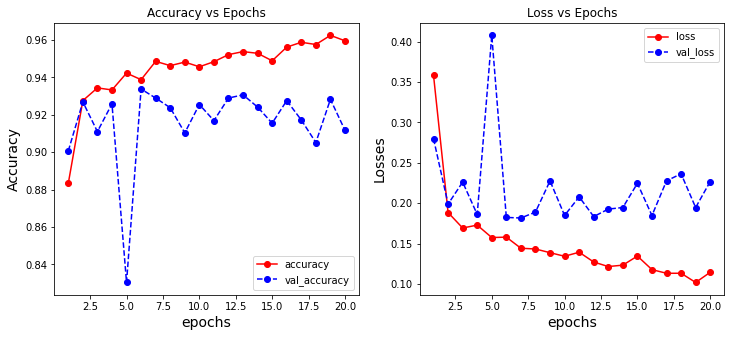

In [23]:
# Plotting accuracy and losses

acc = hist.history['accuracy']
loss = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
epochs = range(1,len(acc)+1)

fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].plot(epochs, acc, 'o-', color='red', label="accuracy")
ax[0].plot(epochs, val_acc, 'o--', color='blue', label='val_accuracy')
ax[0].legend()
ax[0].set_xlabel("epochs", fontsize=14)
ax[0].set_ylabel("Accuracy", fontsize=14)
ax[0].set_title("Accuracy vs Epochs")


ax[1].plot(epochs, loss, 'o-', color='red', label="loss")
ax[1].plot(epochs, val_loss, 'o--', color='blue', label='val_loss')
ax[1].legend()
ax[1].set_xlabel("epochs", fontsize=14)
ax[1].set_ylabel("Losses", fontsize=14)
ax[1].set_title("Loss vs Epochs")

plt.show()

In [24]:
class_dict = train_generator.class_indices
class_dict.items()

dict_items([('Parasitized', 0), ('Uninfected', 1)])

In [25]:
# Function for extracting keys using the class number
def get_key(dict1, val):
  for key,value in dict1.items():
    if val==value:
      return key
  return "key does not exist!"

get_key(class_dict, 1)

'Uninfected'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


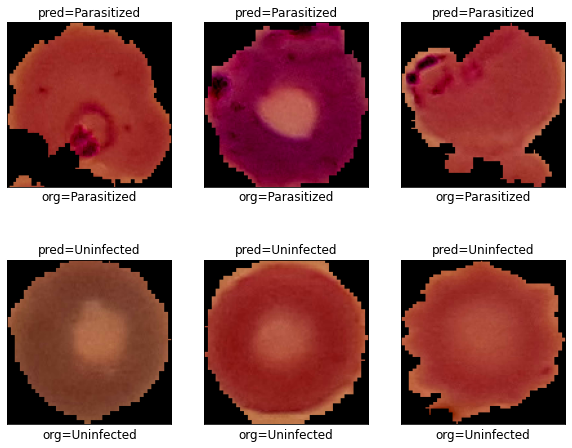

In [38]:
# Prediction for some random images

from keras_preprocessing.image.utils import load_img
import random
import matplotlib.image as mpimg

k = 1
#fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,8))
plt.figure(figsize=(10,8))

for dir in os.listdir(test_path):
  for i in range(3):
    random_image = random.sample(os.listdir(test_path+dir),1)
    img = load_img(test_path+dir+'/'+random_image[0], target_size=(128,128))
    i = preprocess_input(img_to_array(img))
    img_array = np.array([i])

    pred = model.predict(img_array)
    plt.subplot(2,3,k)
    plt.imshow(img_array[0])
    plt.title("pred="+str(get_key(class_dict, np.argmax(pred)))  )
    plt.xlabel("org="+str(dir), fontsize=12)
    plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
    #ax[k,i].axis('off')
    k+=1

plt.show()

In [23]:
#Print the Target Names

target_names = []

for key in val_generator.class_indices:
  target_names.append(key)

target_names

['Parasitized', 'Uninfected']

In [71]:
train_generator.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [72]:
for dir in os.listdir(test_path):
  print(dir, len(os.listdir(test_path+dir)))

Parasitized 3780
Uninfected 3780


In [ ]:
y_test = []
y_actual = []

In [77]:
# Getting predictions for test/Parasitized
from tensorflow.keras.preprocessing.image import load_img
for i in range(400):
  random_image = random.sample(os.listdir(test_path+'Parasitized'),1)
  img = load_img(test_path+'Parasitized/'+random_image[0], target_size=(128,128))
  i = preprocess_input(img_to_array(img))
  #i = np.expand_dims(i, axis=0)
  i = np.array([i])
  p= model.predict(i)
  if(p[0,0]>0.5):
    x=1
  else:
    x=0
  y_test.append(x)
  y_actual.append(1)

In [80]:
# Getting predictions for test/Uninfected
from tensorflow.keras.preprocessing.image import load_img
for i in range(400):
  random_image = random.sample(os.listdir(test_path+'Uninfected'),1)
  img = load_img(test_path+'Uninfected/'+random_image[0], target_size=(128,128))
  i = preprocess_input(img_to_array(img))
  #i = np.expand_dims(i, axis=0)
  i = np.array([i])
  p= model.predict(i)
  if(p[0,0]>0.5):
    x=1
  else:
    x=0
  y_test.append(x)
  y_actual.append(0)

In [81]:
# Confusion matrix

from sklearn.metrics import confusion_matrix, plot_confusion_matrix


print("Confusion Matrix")
cm = confusion_matrix(y_actual,y_test)
cm

Confusion Matrix


array([[358,  42],
       [ 17, 383]])

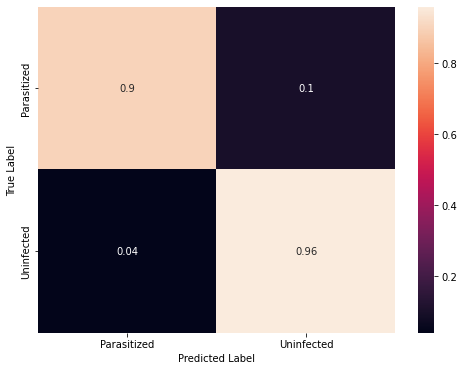

In [100]:
# Plot Confusion matrix
import seaborn as sns

plt.figure(figsize=(8,6))
cm_rounded= np.round(cm/400,2)
sns.heatmap(cm_rounded, annot=True)

plt.xticks([0.5,1.5],['Parasitized','Uninfected'])
plt.yticks([0.5,1.5],['Parasitized','Uninfected'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [101]:
# Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_actual, y_test))
      

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       400
           1       0.90      0.96      0.93       400

    accuracy                           0.93       800
   macro avg       0.93      0.93      0.93       800
weighted avg       0.93      0.93      0.93       800



Conclusion: All the testing and reports suggest that we get good accuracy in predicting the original class using MobilenetV2 model